# Part 8 - NLP Analysis of Reviews

In [1]:
## Run code to get reproducible results BEFORE anything else
import tensorflow as tf
import numpy as np

# Then Set Random Seeds
tf.keras.utils.set_random_seed(42)
tf.random.set_seed(42)
np.random.seed(42)

# Then run the Enable Deterministic Operations Function
tf.config.experimental.enable_op_determinism()

# Source: https://discuss.tensorflow.org/t/upgrading-os-to-sonoma-on-my-mac-causing-tensorflow-errors/19846/5
tf.config.set_visible_devices([], 'GPU')

In [2]:
import os, sys, joblib
# sys.path.append(os.path.abspath("../NLP/"))
# sys.path.append(os.path.abspath("../"))
# sys.path.append(os.path.abspath("../../"))
%load_ext autoreload
%autoreload 2
    
import custom_functions as fn

## Files to Track
-  `data`:
    -  Full dataframe of dataset used
    -  EDA/preview DataFrame
    -  Data from Machine Learning (ML) Models (if applicable):
        -  train-data.joblib (X_train, y_train)
        -  test-data.joblib (X_test, y_test)
    -  Data from Neural Network (NN) Models (if applicable):
        -  TF records (saving Tensorflow Datasets)
     
-  `models`:
    -  for Machine Learning (ML): joblib file or tensorflow model folder)
    -  for Neural Networks (NN): saved keras model folder.
 
- `images`:
    - App assets (e.g. banner png image)
    - Saved Figures
    
- `config`:
    - a file for tracking all of the filepaths above.

In [3]:
from pprint import pprint

FPATHS = dict(
    data={
        "raw": {
            "full": "Data-NLP/tmdb-movie-reviews.csv.gz",
            "eda": "Data-NLP/eda-movie-reviews.csv.gz",
            "eda-joblib": "Data-NLP/eda-movie-reviews.joblib",
            "groups-dict": "Data-NLP/grouped-data-dict.joblib",
        },
        "ml": {
            "train": "Data-NLP/training-data.joblib",  # (X_train,y_train)
            "test": "Data-NLP/testing-data.joblib",  # (X_test,y_test)
        },
        "nn": {
            "train": "data/training-data-tf/",  # train_ds
            "test": "data/testing-data-tf/",  # test_ds
        },
    },
    models={
        # Machine Learning Models and results
        "ml": {
            "bayes": {
                "saved_model": "Models/bayes-clf.joblib",
                "results": "models/results/bayes/",
            },
            "random_forest": {
                "saved_model": "Models/random-forest.joblib",
                "results": "Models/results/random-forest/",
            },
        },
        # Neural networks and results
        "nn": {
            "LSTM": {
                "saved_model": "Models/keras/lstm/",
                "results": "Models/results/lstm/results/",
            },
            "Attention": {
                "saved_model": "models/keras/attn/",
                "results": "models/results/attn/results/",
            },
        },
    },
    images={
        "banner": "images/app-banner.png",
    },
    # Additional metadata (target lookup,etc.)
    metadata={
        "target_lookup": "Data-NLP/target-lookup.json",
    },
    # Any images to be displayed in the app
    eda={
        "wordclouds": "EDA/wordclouds-compare.png",
        "scattertext": "EDA/scattertext.html",
    },
)
fn.utils.create_directories_from_paths(FPATHS)

pprint(FPATHS)

# fn.deploy.save_filepath_config(FPATHS)
# pprint(FPATHS)

import json

## Save the filepaths
import os

os.makedirs("config/", exist_ok=True)
FPATHS_FILE = "config/filepaths.json"
with open(FPATHS_FILE, "w") as f:
    json.dump(FPATHS, f)

{'data': {'ml': {'test': 'Data-NLP/testing-data.joblib',
                 'train': 'Data-NLP/training-data.joblib'},
          'nn': {'test': 'data/testing-data-tf/',
                 'train': 'data/training-data-tf/'},
          'raw': {'eda': 'Data-NLP/eda-movie-reviews.csv.gz',
                  'eda-joblib': 'Data-NLP/eda-movie-reviews.joblib',
                  'full': 'Data-NLP/tmdb-movie-reviews.csv.gz',
                  'groups-dict': 'Data-NLP/grouped-data-dict.joblib'}},
 'eda': {'scattertext': 'EDA/scattertext.html',
         'wordclouds': 'EDA/wordclouds-compare.png'},
 'images': {'banner': 'images/app-banner.png'},
 'metadata': {'target_lookup': 'Data-NLP/target-lookup.json'},
 'models': {'ml': {'bayes': {'results': 'models/results/bayes/',
                             'saved_model': 'Models/bayes-clf.joblib'},
                   'random_forest': {'results': 'Models/results/random-forest/',
                                     'saved_model': 'Models/random-forest.joblib'}

In [4]:
with open("config/filepaths.json") as f:
    FPATHS = json.load(f)
FPATHS

{'data': {'raw': {'full': 'Data-NLP/tmdb-movie-reviews.csv.gz',
   'eda': 'Data-NLP/eda-movie-reviews.csv.gz',
   'eda-joblib': 'Data-NLP/eda-movie-reviews.joblib',
   'groups-dict': 'Data-NLP/grouped-data-dict.joblib'},
  'ml': {'train': 'Data-NLP/training-data.joblib',
   'test': 'Data-NLP/testing-data.joblib'},
  'nn': {'train': 'data/training-data-tf/', 'test': 'data/testing-data-tf/'}},
 'models': {'ml': {'bayes': {'saved_model': 'Models/bayes-clf.joblib',
    'results': 'models/results/bayes/'},
   'random_forest': {'saved_model': 'Models/random-forest.joblib',
    'results': 'Models/results/random-forest/'}},
  'nn': {'LSTM': {'saved_model': 'Models/keras/lstm/',
    'results': 'Models/results/lstm/results/'},
   'Attention': {'saved_model': 'models/keras/attn/',
    'results': 'models/results/attn/results/'}}},
 'images': {'banner': 'images/app-banner.png'},
 'metadata': {'target_lookup': 'Data-NLP/target-lookup.json'},
 'eda': {'wordclouds': 'EDA/wordclouds-compare.png',
  'sc

In [5]:
FPATHS['data']['raw']

{'full': 'Data-NLP/tmdb-movie-reviews.csv.gz',
 'eda': 'Data-NLP/eda-movie-reviews.csv.gz',
 'eda-joblib': 'Data-NLP/eda-movie-reviews.joblib',
 'groups-dict': 'Data-NLP/grouped-data-dict.joblib'}

In [6]:
# ## Save the filepaths 
# import os, json
# os.makedirs('config/', exist_ok=True)
# FPATHS_FILE = 'config/filepaths.json'
# with open(FPATHS_FILE, 'w') as f:
#     json.dump(FPATHS, f)

## ✅ To Do:


- [ ] Move notebook functions to project_functions.py
- [ ] Add NLP EDA by
    - ...Rating?
    - Profit?
- [ ] 

# Analysis

In [7]:
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import layers
from tensorflow.keras import optimizers

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from pprint import pprint
from sklearn import set_config
set_config(transform_output='pandas')

pd.set_option('display.max_colwidth', 250)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno

pd.set_option('display.max_columns',100)


import nltk
import wordcloud
import gzip, json

import matplotlib.pyplot as plt
import seaborn as sns
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [8]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import (CountVectorizer,TfidfTransformer, 
                                             TfidfVectorizer,ENGLISH_STOP_WORDS)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import nltk 
from nltk import TweetTokenizer, word_tokenize,wordpunct_tokenize
import string
from wordcloud import WordCloud



from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## #NOT THE MOST RECENT VERSIONS!!!!
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# def classification_metrics(y_true, y_pred, label='',
#                            output_dict=False, figsize=(8,4),
#                            normalize='true', cmap='Blues',
#                            colorbar=False):
#   # Get the classification report
#   report = classification_report(y_true, y_pred)
#   ## Print header and report
#   header = "-"*70
#   print(header, f" Classification Metrics: {label}", header, sep='\n')
#   print(report)
#   ## CONFUSION MATRICES SUBPLOTS
#   fig, axes = plt.subplots(ncols=2, figsize=figsize)
#   # create a confusion matrix  of raw counts
#   ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
#                 normalize=None, cmap='gist_gray', colorbar=colorbar,
#                 ax = axes[0],);
#   axes[0].set_title("Raw Counts")
#   # create a confusion matrix with the test data
#   ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
#                 normalize=normalize, cmap=cmap, colorbar=colorbar,
#                 ax = axes[1]);
#   axes[1].set_title("Normalized Confusion Matrix")
#   # Adjust layout and show figure
#   fig.tight_layout()
#   plt.show()
#   # Return dictionary of classification_report
#   if output_dict==True:
#     report_dict = classification_report(y_true, y_pred, output_dict=True)
#     return report_dict


# def evaluate_classification(model, X_train, y_train, X_test, y_test,
#                          figsize=(6,4), normalize='true', output_dict = False,
#                             cmap_train='Blues', cmap_test="Reds",colorbar=False):
#   # Get predictions for training data
#   y_train_pred = model.predict(X_train)
#   # Call the helper function to obtain regression metrics for training data
#   results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
#                                      output_dict=True, figsize=figsize,
#                                          colorbar=colorbar, cmap=cmap_train,
#                                      label='Training Data')
#   print()
#   # Get predictions for test data
#   y_test_pred = model.predict(X_test)
#   # Call the helper function to obtain regression metrics for test data
#   results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
#                                   output_dict=True,figsize=figsize,
#                                          colorbar=colorbar, cmap=cmap_test,
#                                     label='Test Data' )
#   if output_dict == True:
#     # Store results in a dataframe if ouput_frame is True
#     results_dict = {'train':results_train,
#                     'test': results_test}
#     return results_dict





# def get_ngram_measures_finder(tokens=None,docs=None, ngrams=2, verbose=False,
#                               get_scores_df=False, measure='raw_freq', top_n=None,
#                              words_colname='Words'):
#     import nltk
#     if ngrams == 4:
#         MeasuresClass = nltk.collocations.QuadgramAssocMeasures
#         FinderClass = nltk.collocations.QuadgramCollocationFinder
        
#     elif ngrams == 3: 
#         MeasuresClass = nltk.collocations.TrigramAssocMeasures
#         FinderClass = nltk.collocations.TrigramCollocationFinder
#     else:
#         MeasuresClass = nltk.collocations.BigramAssocMeasures
#         FinderClass = nltk.collocations.BigramCollocationFinder

#     measures = MeasuresClass()
    
#     if (tokens is not None):
#         finder = FinderClass.from_words(tokens)
#     elif (docs is not None):
#         finder = FinderClass.from_docs(docs)
#     else:
#         raise Exception("Must provide tokens or docs")
        

#     if get_scores_df == False:
#         return measures, finder
#     else:
#         df_ngrams = get_score_df(measures, finder, measure=measure, top_n=top_n, words_colname=words_colname)
#         return df_ngrams




# def get_score_df( measures,finder, measure='raw_freq', top_n=None, words_colname="Words"):
#     import pandas as pd
#     if measure=='pmi':
#         scored_ngrams = finder.score_ngrams(measures.pmi)
#     else:
#         measure='raw_freq'
#         scored_ngrams = finder.score_ngrams(measures.raw_freq)

#     df_ngrams = pd.DataFrame(scored_ngrams, columns=[words_colname, measure.replace("_",' ').title()])
#     if top_n is not None:
#         return df_ngrams.head(top_n)
#     else:
#         return df_ngrams

# import pandas as pd
# def get_ngram_measures_finder(tokens, ngrams=2, get_scores_df=False, measure='raw_freq', top_n=None, min_freq = 1,
#                              words_colname='Words'):
#     import nltk
#     if ngrams == 4:
#         MeasuresClass = nltk.collocations.QuadgramAssocMeasures
#         FinderClass = nltk.collocations.QuadgramCollocationFinder
        
#     elif ngrams == 3: 
#         MeasuresClass = nltk.collocations.TrigramAssocMeasures
#         FinderClass = nltk.collocations.TrigramCollocationFinder
#     else:
#         MeasuresClass = nltk.collocations.BigramAssocMeasures
#         FinderClass = nltk.collocations.BigramCollocationFinder

#     measures = MeasuresClass()
    
   
#     finder = FinderClass.from_words(tokens)
#     finder.apply_freq_filter(min_freq)
#     if measure=='pmi':
#         scored_ngrams = finder.score_ngrams(measures.pmi)
#     else:
#         measure='raw_freq'
#         scored_ngrams = finder.score_ngrams(measures.raw_freq)

#     df_ngrams = pd.DataFrame(scored_ngrams, columns=[words_colname, measure.replace("_",' ').title()])
#     if top_n is not None:
#         return df_ngrams.head(top_n)
#     else:
#         return df_ngrams



# from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt


# def classification_metrics(y_true, y_pred, label='',
#                            output_dict=False, figsize=(8,4),
#                            normalize='true', cmap='Blues',
#                            colorbar=False,values_format=".2f"):
#     """Classification metrics function from Intro to Machine Learning"""
#     # Get the classification report
#     report = classification_report(y_true, y_pred)
#     ## Print header and report
#     header = "-"*70
#     print(header, f" Classification Metrics: {label}", header, sep='\n')
#     print(report)
    
#     ## CONFUSION MATRICES SUBPLOTS
#     fig, axes = plt.subplots(ncols=2, figsize=figsize)
    
#     # create a confusion matrix  of raw counts
#     ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
#                 normalize=None, cmap='gist_gray_r', values_format="d", colorbar=colorbar,
#                 ax = axes[0],);
#     axes[0].set_title("Raw Counts")
    
#     # create a confusion matrix with the test data
#     ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
#                 normalize=normalize, cmap=cmap, values_format=values_format, colorbar=colorbar,
#                 ax = axes[1]);
#     axes[1].set_title("Normalized Confusion Matrix")
    
#     # Adjust layout and show figure
#     fig.tight_layout()
#     plt.show()
    
#     # Return dictionary of classification_report
#     if output_dict==True:
#         report_dict = classification_report(y_true, y_pred, output_dict=True)
#         return report_dict

    

# def preprocess_text(txt, nlp=None, remove_stopwords=True, remove_punct=True, use_lemmas=False,):
# 	"""Preprocess text into tokens/lemmas. 

# 	Args:
# 		txt (string): text to process
# 		nlp (spacy pipe), optional): Spacy nlp pipe. Defaults to None
#   									if None, it creates a default 'en_core_web_sm' pipe.
# 		remove_stopwords (bool, optional): Controls stopword removal. Defaults to True.
# 		remove_punct (bool, optional): Controls punctuation removal. Defaults to True.
# 		use_lemmas (bool, optional): lemmatize tokens. Defaults to False.

# 	Returns:
# 		list: list of tokens/lemmas
# 	"""
# 	if nlp is None:
# 		nlp = spacy.load('en_core_web_sm')

# 	doc = nlp(txt)

# 	# Saving list of the token objects for stopwords and punctuation removal
# 	tokens = []

# 	for token in doc:
# 		# Check if should remove stopwords and if token is stopword
# 		if (remove_stopwords == True) & (token.is_stop == True):
# 			# Continue the loop with the next token
# 			continue
	
# 		# Check if should remove punctuation and if token is punctuation
# 		if (remove_punct == True) & (token.is_punct == True):
# 			# Continue the loop with the next oken
# 			continue

# 		# Check if should remove punctuation and if token is a space
# 		if (remove_punct == True) & (token.is_space == True):
# 			# Continue the loop with the next oken
# 			continue
	
# 		# Determine final form of output list of tokens/lemmas
# 		if use_lemmas:
# 			tokens.append(token.lemma_)
# 		else:
# 			tokens.append(token.text.lower())

# 	return tokens




# def get_true_pred_labels(model,ds):
#     """Gets the labels and predicted probabilities from a Tensorflow model and Dataset object.
#     Adapted from source: https://stackoverflow.com/questions/66386561/keras-classification-report-accuracy-is-different-between-model-predict-accurac
#     """
#     y_true = []
#     y_pred_probs = []
    
#     # Loop through the dataset as a numpy iterator
#     for images, labels in ds.as_numpy_iterator():
        
#         # Get prediction with batch_size=1
#         y_probs = model.predict(images, batch_size=1, verbose=0)

#         # Combine previous labels/preds with new labels/preds
#         y_true.extend(labels)
#         y_pred_probs.extend(y_probs)

#     ## Convert the lists to arrays
#     y_true = np.array(y_true)
#     y_pred_probs = np.array(y_pred_probs)
    
#     return y_true, y_pred_probs
    

# def convert_y_to_sklearn_classes(y, verbose=False):
#     # If already one-dimension
#     if np.ndim(y)==1:
#         if verbose:
#             print("- y is 1D, using it as-is.")
#         return y
        
#     # If 2 dimensions with more than 1 column:
#     elif y.shape[1]>1:
#         if verbose:
#             print("- y has is 2D with >1 column. Using argmax for metrics.")   
#         return np.argmax(y, axis=1)
    
#     else:
#         if verbose:
#             print("y has 2D with 1 column. Using round for metrics.")
#         return np.round(y).flatten().astype(int)


# def evaluate_classification_network(model, 
#                                     X_train=None, y_train=None, 
#                                     X_test=None, y_test=None,
#                                     history=None, history_figsize=(6,6),
#                                     figsize=(6,4), normalize='true',
#                                     output_dict = False,
#                                     cmap_train='Blues',
#                                     cmap_test="Reds",
#                                     values_format=".2f", 
#                                     colorbar=False):
#     """Evaluates a neural network classification task using either
#     separate X and y arrays or a tensorflow Dataset
    
#     Data Args:
#         X_train (array, or Dataset)
#         y_train (array, or None if using a Dataset
#         X_test (array, or Dataset)
#         y_test (array, or None if using a Dataset)
#         history (history object)
#         """
#     # Plot history, if provided
#     if history is not None:
#         plot_history(history, figsize=history_figsize)

#     ## Adding a Print Header
#     print("\n"+'='*80)
#     print('- Evaluating Network...')
#     print('='*80)

    
#     ## TRAINING DATA EVALUATION
#     # check if X_train was provided
#     if X_train is not None:
#         ## Check if X_train is a dataset
#         if hasattr(X_train,'map'):
#             # If it IS a Datset:
#             # extract y_train and y_train_pred with helper function
#             y_train, y_train_pred = get_true_pred_labels(model, X_train)
#         else:
#             # Get predictions for training data
#             y_train_pred = model.predict(X_train)

#         ## Pass both y-vars through helper compatibility function
#         y_train = convert_y_to_sklearn_classes(y_train)
#         y_train_pred = convert_y_to_sklearn_classes(y_train_pred)
        
#         # Call the helper function to obtain regression metrics for training data
#         results_train = classification_metrics(y_train, y_train_pred, 
#                                          output_dict=True, figsize=figsize,
#                                              colorbar=colorbar, cmap=cmap_train,
#                                                values_format=values_format,
#                                          label='Training Data')
        
#         ## Run model.evaluate         
#         print("\n- Evaluating Training Data:")
#         print(model.evaluate(X_train, return_dict=True))
    
#     # If no X_train, then save empty list for results_train
#     else:
#         results_train = []


#     ## TEST DATA EVALUATION
#     # check if X_test was provided
#     if X_test is not None:
#         ## Check if X_train is a dataset
#         if hasattr(X_test,'map'):
#             # If it IS a Datset:
#             # extract y_train and y_train_pred with helper function
#             y_test, y_test_pred = get_true_pred_labels(model, X_test)
#         else:
#             # Get predictions for training data
#             y_test_pred = model.predict(X_test)

#         ## Pass both y-vars through helper compatibility function
#         y_test = convert_y_to_sklearn_classes(y_test)
#         y_test_pred = convert_y_to_sklearn_classes(y_test_pred)
        
#         # Call the helper function to obtain regression metrics for training data
#         results_test = classification_metrics(y_test, y_test_pred, 
#                                          output_dict=True, figsize=figsize,
#                                              colorbar=colorbar, cmap=cmap_test,
#                                               values_format=values_format,
#                                          label='Test Data')
        
#         ## Run model.evaluate         
#         print("\n- Evaluating Test Data:")
#         print(model.evaluate(X_test, return_dict=True))
      
#     # If no X_test, then save empty list for results_test
#     else:
#         results_test = []
      

#     # Store results in a dataframe if ouput_frame is True
#     results_dict = {'train':results_train,
#                     'test': results_test}
#     return results_dict





# def get_true_pred_labels(model, ds):
#     """Gets the labels and predicted probabilities from a Tensorflow model and Dataset object.
#     Adapted from source: https://stackoverflow.com/questions/66386561/keras-classification-report-accuracy-is-different-between-model-predict-accurac
#     """
#     y_true = []
#     y_pred_probs = []

#     # Loop through the dataset as a numpy iterator
#     for images, labels in ds.as_numpy_iterator():
#         # Get prediction with batch_size=1
#         y_probs = model.predict(images, batch_size=1, verbose=0)

#         # Combine previous labels/preds with new labels/preds
#         y_true.extend(labels)
#         y_pred_probs.extend(y_probs)

#     ## Convert the lists to arrays
#     y_true = np.array(y_true)
#     y_pred_probs = np.array(y_pred_probs)

#     return y_true, y_pred_probs


# def convert_y_to_sklearn_classes(y, verbose=False):
#     # If already one-dimension
#     if np.ndim(y) == 1:
#         if verbose:
#             print("- y is 1D, using it as-is.")
#         return y

#     # If 2 dimensions with more than 1 column:
#     elif y.shape[1] > 1:
#         if verbose:
#             print("- y has is 2D with >1 column. Using argmax for metrics.")
#         return np.argmax(y, axis=1)

#     else:
#         if verbose:
#             print("y has 2D with 1 column. Using round for metrics.")
#         return np.round(y).flatten().astype(int)


# import numpy as np
# import pandas as pd
# from IPython.display import display


# ## Update to add option to save  (
# # or just return the plot and have the evaluate_classification_network function
# # do the saving)
# def plot_history(history, figsize=(6, 8)):
#     import numpy as np
#     import matplotlib.pyplot as plt
#     # Get a unique list of metrics
#     all_metrics = np.unique([k.replace("val_", "") for k in history.history.keys()])

#     # Plot each metric
#     n_plots = len(all_metrics)
#     fig, axes = plt.subplots(nrows=n_plots, figsize=figsize)
#     axes = axes.flatten()

#     # Loop through metric names add get an index for the axes
#     for i, metric in enumerate(all_metrics):
#         # Get the epochs and metric values
#         epochs = history.epoch
#         score = history.history[metric]

#         # Plot the training results
#         axes[i].plot(epochs, score, label=metric, marker=".")
#         # Plot val results (if they exist)
#         try:
#             val_score = history.history[f"val_{metric}"]
#             axes[i].plot(epochs, val_score, label=f"val_{metric}", marker=".")
#         except:
#             pass

#         finally:
#             axes[i].legend()
#             axes[i].set(title=metric, xlabel="Epoch", ylabel=metric)

#     # Adjust subplots and show
#     fig.tight_layout()
#     plt.show()
#     return fig



## Load Data

In [9]:
LOAD_PREVIOUS = True


fpath_eda_data =FPATHS['data']['raw']['eda']
fpath_eda_joblib =FPATHS['data']['raw']['eda-joblib']
fpath_group_dict = FPATHS['data']['raw']['groups-dict']


if LOAD_PREVIOUS == True:
    
    # df = pd.read_csv(fpath_eda_data)
    # df.info()
    # display(df.head())
    df = joblib.load(fpath_eda_joblib)
    GROUP_TEXTS = joblib.load(fpath_group_dict)
else:
    raw_data = FPATHS['data']['raw']['full']
    df = pd.read_csv(raw_data) 
df

,movie_id,review_id,author_rating,review_text,created_at,target,length,tokens-dirty,tokens,lemmas,tokens-dirty-combined,tokens-combined,lemmas-combined
3,294963,56c0b64cc3a36817f200c7c7,9.0,"It's sure to be a bone of contention...\r\n\r\nWritten and directed by S. Craig Zahler, Bone Tomahawk stars Kurt Russell, Patrick Wilson, Matthew Fox, Richard Jenkins and Lili Simmons. Music is by Zahler and Jeff Herriott and cinematography by Be...",2016-02-14 17:15:56.656000+00:00,Great,420,"[it, 's, sure, to, be, a, bone, of, contention, written, and, directed, by, s., craig, zahler, bone, tomahawk, stars, kurt, russell, patrick, wilson, matthew, fox, richard, jenkins, and, lili, simmons, music, is, by, zahler, and, jeff, herriott, ...","[sure, bone, contention, written, directed, s., craig, zahler, bone, tomahawk, stars, kurt, russell, patrick, wilson, matthew, fox, richard, jenkins, lili, simmons, music, zahler, jeff, herriott, cinematography, benji, bakshi, ah, yes, horror, we...","[sure, bone, contention, write, direct, s., craig, zahler, bone, tomahawk, star, kurt, russell, patrick, wilson, matthew, fox, richard, jenkins, lili, simmons, music, zahler, jeff, herriott, cinematography, benji, bakshi, ah, yes, horror, western...",it 's sure to be a bone of contention written and directed by s. craig zahler bone tomahawk stars kurt russell patrick wilson matthew fox richard jenkins and lili simmons music is by zahler and jeff herriott and cinematography by benji bakshi ah ...,sure bone contention written directed s. craig zahler bone tomahawk stars kurt russell patrick wilson matthew fox richard jenkins lili simmons music zahler jeff herriott cinematography benji bakshi ah yes horror western hybrid difficult thing rig...,sure bone contention write direct s. craig zahler bone tomahawk star kurt russell patrick wilson matthew fox richard jenkins lili simmons music zahler jeff herriott cinematography benji bakshi ah yes horror western hybrid difficult thing right go...
8,314405,58446d659251416a8000c996,8.0,"**The flea, the flay and an offspring.**\r\n\r\nIt's shocking to find how much this film was underrated. Certainly it is not a fairytale like from the Disney production. That mean not for the children, but for the adults. Based on the collections...",2016-12-04 19:24:21.989000+00:00,Great,806,"[the, flea, the, flay, and, an, offspring, it, 's, shocking, to, find, how, much, this, film, was, underrated, certainly, it, is, not, a, fairytale, like, from, the, disney, production, that, mean, not, for, the, children, but, for, the, adults, ...","[flea, flay, offspring, shocking, find, film, underrated, certainly, fairytale, like, disney, production, mean, children, adults, based, collections, tales, 17th, century, italian, poet, tales, blended, wo, feel, familiarity, original, tale, modi...","[flea, flay, offspring, shocking, find, film, underrated, certainly, fairytale, like, disney, production, mean, child, adult, base, collection, tale, 17th, century, italian, poet, tale, blend, will, feel, familiarity, original, tale, modification...",the flea the flay and an offspring it 's shocking to find how much this film was underrated certainly it is not a fairytale like from the disney production that mean not for the children but for the adults based on the collections of tales by som...,flea flay offspring shocking find film underrated certainly fairytale like disney production mean children adults based collections tales 17th century italian poet tales blended wo feel familiarity original tale modifications best appreciate writ...,flea flay offspring shocking find film underrated certainly fairytale like disney production mean child adult base collection tale 17th century italian poet tale blend will feel familiarity original tale modification good appreciate writer direct...
12,320048,56fc6e96c3a36848120004fd,5.0,This movie was terrible; obviously up-rated by interested parties - boring & suspenseful.,2016-03-31 00:25:58.815000+00:00,Bad,13,"

<Axes: >

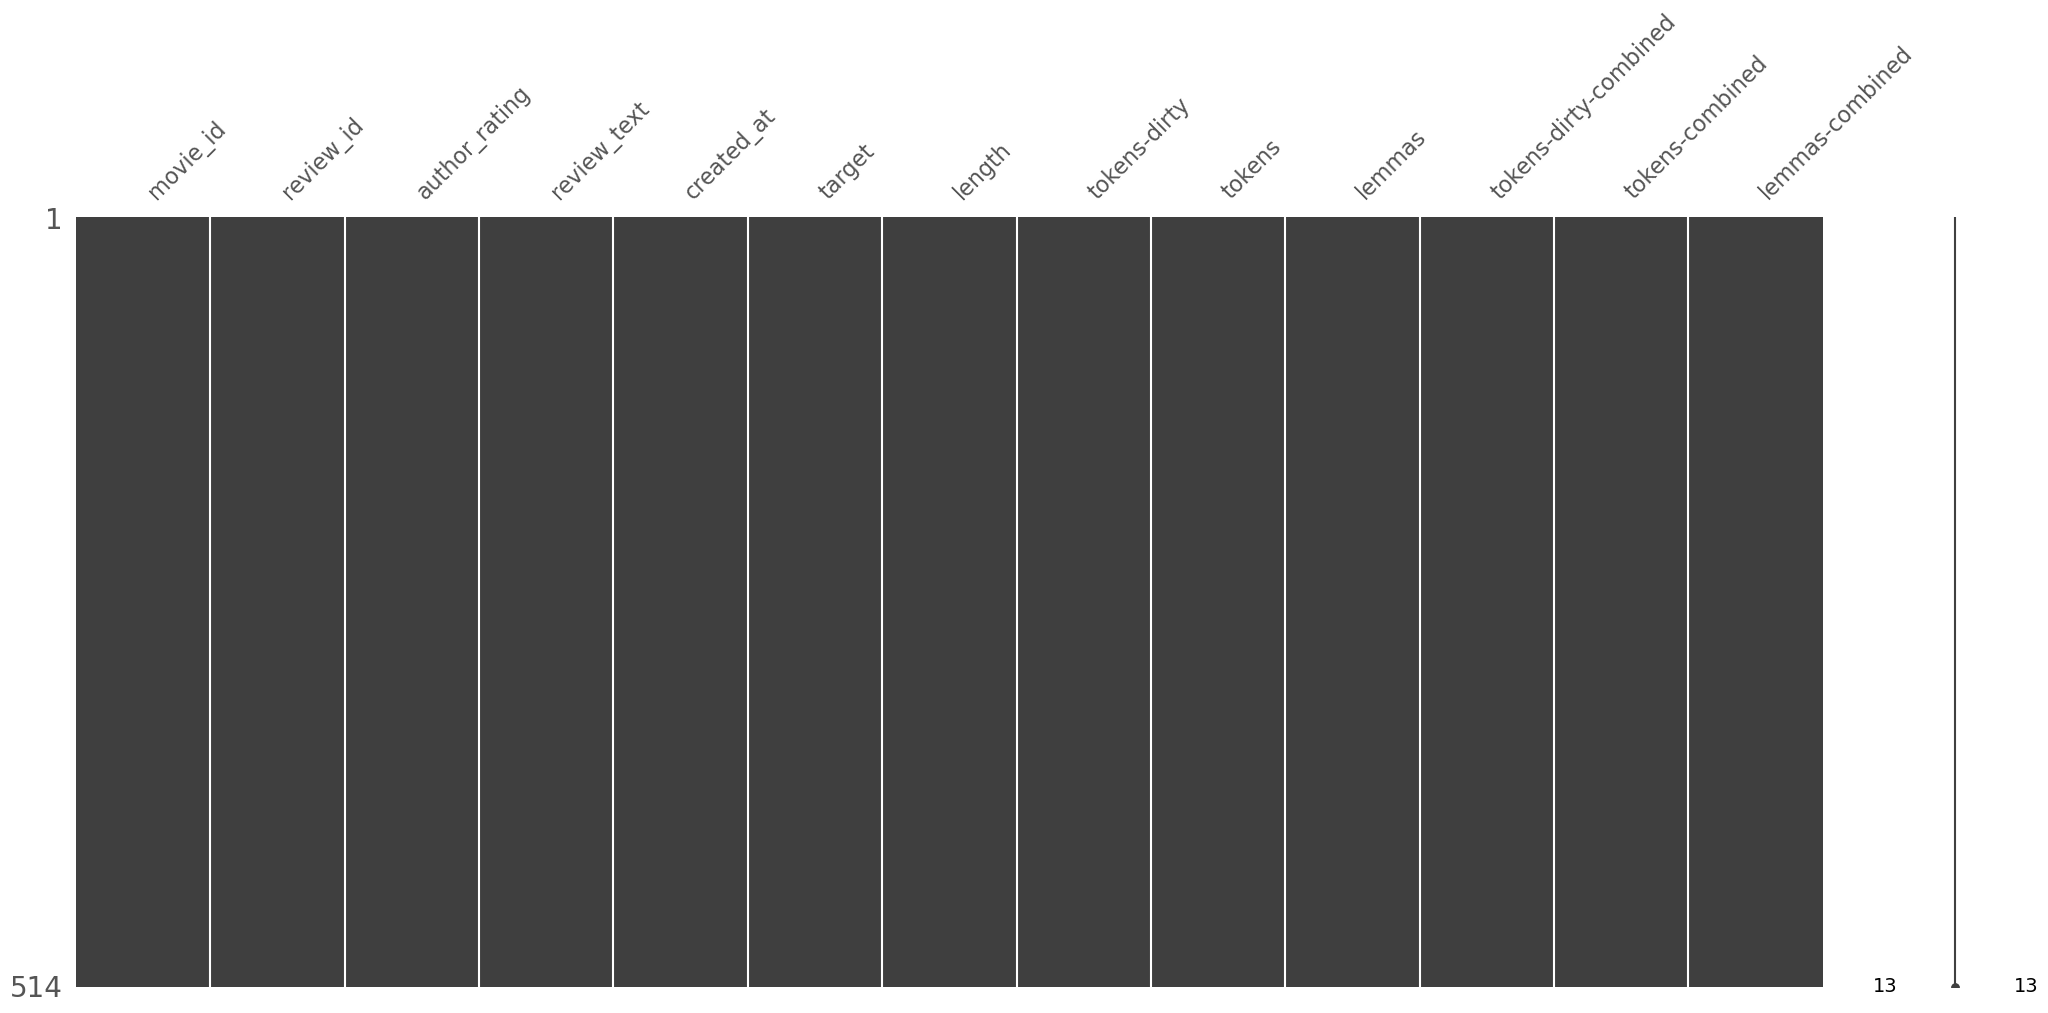

In [10]:
import missingno 
missingno.matrix(df)

In [11]:
df = df.dropna(subset=['author_rating'])
df

,movie_id,review_id,author_rating,review_text,created_at,target,length,tokens-dirty,tokens,lemmas,tokens-dirty-combined,tokens-combined,lemmas-combined
3,294963,56c0b64cc3a36817f200c7c7,9.0,"It's sure to be a bone of contention...\r\n\r\nWritten and directed by S. Craig Zahler, Bone Tomahawk stars Kurt Russell, Patrick Wilson, Matthew Fox, Richard Jenkins and Lili Simmons. Music is by Zahler and Jeff Herriott and cinematography by Be...",2016-02-14 17:15:56.656000+00:00,Great,420,"[it, 's, sure, to, be, a, bone, of, contention, written, and, directed, by, s., craig, zahler, bone, tomahawk, stars, kurt, russell, patrick, wilson, matthew, fox, richard, jenkins, and, lili, simmons, music, is, by, zahler, and, jeff, herriott, ...","[sure, bone, contention, written, directed, s., craig, zahler, bone, tomahawk, stars, kurt, russell, patrick, wilson, matthew, fox, richard, jenkins, lili, simmons, music, zahler, jeff, herriott, cinematography, benji, bakshi, ah, yes, horror, we...","[sure, bone, contention, write, direct, s., craig, zahler, bone, tomahawk, star, kurt, russell, patrick, wilson, matthew, fox, richard, jenkins, lili, simmons, music, zahler, jeff, herriott, cinematography, benji, bakshi, ah, yes, horror, western...",it 's sure to be a bone of contention written and directed by s. craig zahler bone tomahawk stars kurt russell patrick wilson matthew fox richard jenkins and lili simmons music is by zahler and jeff herriott and cinematography by benji bakshi ah ...,sure bone contention written directed s. craig zahler bone tomahawk stars kurt russell patrick wilson matthew fox richard jenkins lili simmons music zahler jeff herriott cinematography benji bakshi ah yes horror western hybrid difficult thing rig...,sure bone contention write direct s. craig zahler bone tomahawk star kurt russell patrick wilson matthew fox richard jenkins lili simmons music zahler jeff herriott cinematography benji bakshi ah yes horror western hybrid difficult thing right go...
8,314405,58446d659251416a8000c996,8.0,"**The flea, the flay and an offspring.**\r\n\r\nIt's shocking to find how much this film was underrated. Certainly it is not a fairytale like from the Disney production. That mean not for the children, but for the adults. Based on the collections...",2016-12-04 19:24:21.989000+00:00,Great,806,"[the, flea, the, flay, and, an, offspring, it, 's, shocking, to, find, how, much, this, film, was, underrated, certainly, it, is, not, a, fairytale, like, from, the, disney, production, that, mean, not, for, the, children, but, for, the, adults, ...","[flea, flay, offspring, shocking, find, film, underrated, certainly, fairytale, like, disney, production, mean, children, adults, based, collections, tales, 17th, century, italian, poet, tales, blended, wo, feel, familiarity, original, tale, modi...","[flea, flay, offspring, shocking, find, film, underrated, certainly, fairytale, like, disney, production, mean, child, adult, base, collection, tale, 17th, century, italian, poet, tale, blend, will, feel, familiarity, original, tale, modification...",the flea the flay and an offspring it 's shocking to find how much this film was underrated certainly it is not a fairytale like from the disney production that mean not for the children but for the adults based on the collections of tales by som...,flea flay offspring shocking find film underrated certainly fairytale like disney production mean children adults based collections tales 17th century italian poet tales blended wo feel familiarity original tale modifications best appreciate writ...,flea flay offspring shocking find film underrated certainly fairytale like disney production mean child adult base collection tale 17th century italian poet tale blend will feel familiarity original tale modification good appreciate writer direct...
12,320048,56fc6e96c3a36848120004fd,5.0,This movie was terrible; obviously up-rated by interested parties - boring & suspenseful.,2016-03-31 00:25:58.815000+00:00,Bad,13,"

In [12]:
df['author_rating'].value_counts(dropna=False)

8.0     129
5.0      95
9.0      66
4.0      66
10.0     54
1.0      49
3.0      30
2.0      23
4.5       1
0.5       1
Name: author_rating, dtype: int64

<Axes: xlabel='author_rating', ylabel='Count'>

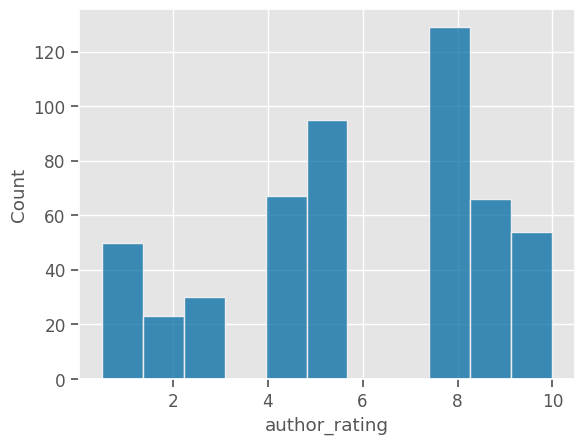

In [13]:
sns.histplot(df['author_rating'])

In [14]:
df['author_rating'].describe()

count    514.000000
mean       6.021401
std        2.870929
min        0.500000
25%        4.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: author_rating, dtype: float64

### Set the Target

In [15]:
target_bins = pd.cut(df['author_rating'], bins = [0,5,7,10], labels=['Bad','OK','Great'])

target_bins.value_counts(1)

Bad      0.515564
Great    0.484436
OK       0.000000
Name: author_rating, dtype: float64

In [16]:
df['target'] = target_bins.copy()

In [17]:
## TO MAKE A BINARY TASK
df['target'] = df['target'].replace('OK',None)
df = df.dropna(subset=['target'])

In [18]:
# df = df.copy()

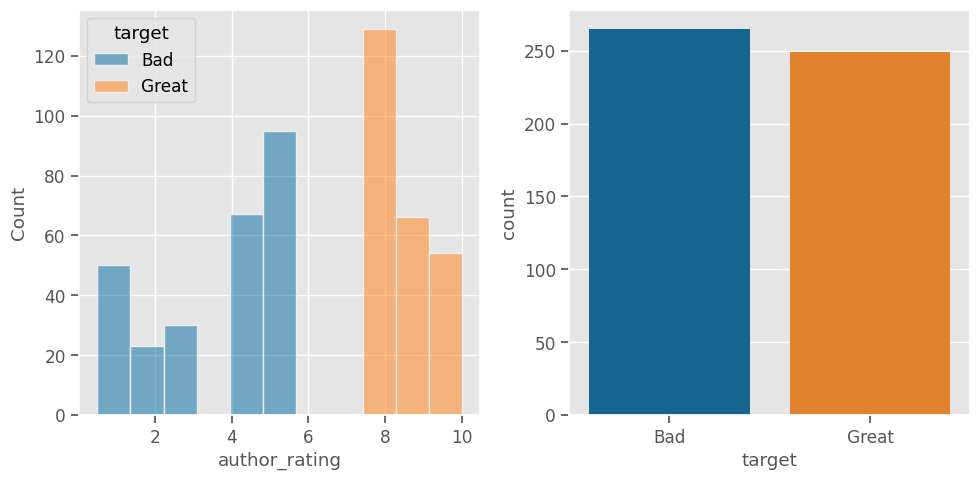

In [19]:
fig, axes =  plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(data=df, x='author_rating', hue='target', ax=axes[0])
sns.countplot(data=df, x='target', ax=axes[1])
fig.tight_layout()

In [20]:
# pd.cut(df['author_rating'] ,bins=3).value_counts(1)

In [21]:
df['length'] = df['review_text'].map(lambda x: len(x.split()))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 3 to 1053
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   movie_id               514 non-null    int64   
 1   review_id              514 non-null    object  
 2   author_rating          514 non-null    float64 
 3   review_text            514 non-null    object  
 4   created_at             514 non-null    object  
 5   target                 514 non-null    category
 6   length                 514 non-null    int64   
 7   tokens-dirty           514 non-null    object  
 8   tokens                 514 non-null    object  
 9   lemmas                 514 non-null    object  
 10  tokens-dirty-combined  514 non-null    object  
 11  tokens-combined        514 non-null    object  
 12  lemmas-combined        514 non-null    object  
dtypes: category(1), float64(1), int64(2), object(9)
memory usage: 52.8+ KB


,movie_id,review_id,author_rating,review_text,created_at,target,length,tokens-dirty,tokens,lemmas,tokens-dirty-combined,tokens-combined,lemmas-combined
3,294963,56c0b64cc3a36817f200c7c7,9.0,"It's sure to be a bone of contention...\r\n\r\nWritten and directed by S. Craig Zahler, Bone Tomahawk stars Kurt Russell, Patrick Wilson, Matthew Fox, Richard Jenkins and Lili Simmons. Music is by Zahler and Jeff Herriott and cinematography by Be...",2016-02-14 17:15:56.656000+00:00,Great,420,"[it, 's, sure, to, be, a, bone, of, contention, written, and, directed, by, s., craig, zahler, bone, tomahawk, stars, kurt, russell, patrick, wilson, matthew, fox, richard, jenkins, and, lili, simmons, music, is, by, zahler, and, jeff, herriott, ...","[sure, bone, contention, written, directed, s., craig, zahler, bone, tomahawk, stars, kurt, russell, patrick, wilson, matthew, fox, richard, jenkins, lili, simmons, music, zahler, jeff, herriott, cinematography, benji, bakshi, ah, yes, horror, we...","[sure, bone, contention, write, direct, s., craig, zahler, bone, tomahawk, star, kurt, russell, patrick, wilson, matthew, fox, richard, jenkins, lili, simmons, music, zahler, jeff, herriott, cinematography, benji, bakshi, ah, yes, horror, western...",it 's sure to be a bone of contention written and directed by s. craig zahler bone tomahawk stars kurt russell patrick wilson matthew fox richard jenkins and lili simmons music is by zahler and jeff herriott and cinematography by benji bakshi ah ...,sure bone contention written directed s. craig zahler bone tomahawk stars kurt russell patrick wilson matthew fox richard jenkins lili simmons music zahler jeff herriott cinematography benji bakshi ah yes horror western hybrid difficult thing rig...,sure bone contention write direct s. craig zahler bone tomahawk star kurt russell patrick wilson matthew fox richard jenkins lili simmons music zahler jeff herriott cinematography benji bakshi ah yes horror western hybrid difficult thing right go...
8,314405,58446d659251416a8000c996,8.0,"**The flea, the flay and an offspring.**\r\n\r\nIt's shocking to find how much this film was underrated. Certainly it is not a fairytale like from the Disney production. That mean not for the children, but for the adults. Based on the collections...",2016-12-04 19:24:21.989000+00:00,Great,806,"[the, flea, the, flay, and, an, offspring, it, 's, shocking, to, find, how, much, this, film, was, underrated, certainly, it, is, not, a, fairytale, like, from, the, disney, production, that, mean, not, for, the, children, but, for, the, adults, ...","[flea, flay, offspring, shocking, find, film, underrated, certainly, fairytale, like, disney, production, mean, children, adults, based, collections, tales, 17th, century, italian, poet, tales, blended, wo, feel, familiarity, original, tale, modi...","[flea, flay, offspring, shocking, find, film, underrated, certainly, fairytale, like, disney, production, mean, child, adult, base, collection, tale, 17th, century, italian, poet, tale, blend, will, feel, familiarity, original, tale, modification...",the flea the flay and an offspring it 's shocking to find how much this film was underrated certainly it is not a fairytale like from the disney production that mean not for the children but for the adults based on the collections of tales by som...,flea flay offspring shocking find film underrated certainly fairytale like disney production mean children adults based collections tales 17th century italian poet tales blended wo feel familiarity original tale modifications best appreciate writ...,flea flay offspring shocking find film underrated certainly fairytale like disney production mean child adult base collection tale 17th century italian poet tale blend will feel familiarity original tale modification good appreciate writer direct...
12,320048,56fc6e96c3a36848120004fd,5.0,This movie was terrible; obviously up-rated by interested parties - boring & suspenseful.,2016-03-31 00:25:58.815000+00:00,Bad,13,"

<Axes: xlabel='length', ylabel='Count'>

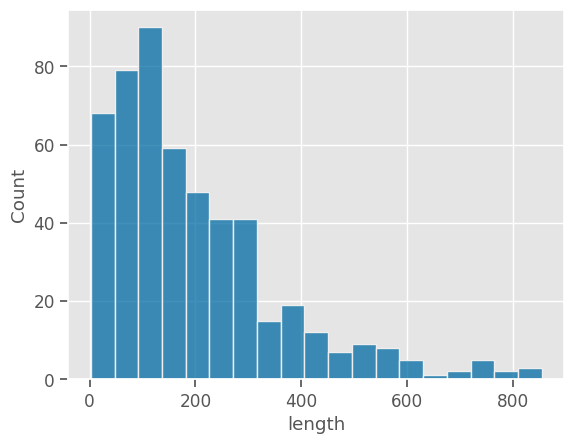

In [22]:
sns.histplot(data=df, x='length')

In [23]:
df = df.loc[ df['length']<1000]
df

,movie_id,review_id,author_rating,review_text,created_at,target,length,tokens-dirty,tokens,lemmas,tokens-dirty-combined,tokens-combined,lemmas-combined
3,294963,56c0b64cc3a36817f200c7c7,9.0,"It's sure to be a bone of contention...\r\n\r\nWritten and directed by S. Craig Zahler, Bone Tomahawk stars Kurt Russell, Patrick Wilson, Matthew Fox, Richard Jenkins and Lili Simmons. Music is by Zahler and Jeff Herriott and cinematography by Be...",2016-02-14 17:15:56.656000+00:00,Great,420,"[it, 's, sure, to, be, a, bone, of, contention, written, and, directed, by, s., craig, zahler, bone, tomahawk, stars, kurt, russell, patrick, wilson, matthew, fox, richard, jenkins, and, lili, simmons, music, is, by, zahler, and, jeff, herriott, ...","[sure, bone, contention, written, directed, s., craig, zahler, bone, tomahawk, stars, kurt, russell, patrick, wilson, matthew, fox, richard, jenkins, lili, simmons, music, zahler, jeff, herriott, cinematography, benji, bakshi, ah, yes, horror, we...","[sure, bone, contention, write, direct, s., craig, zahler, bone, tomahawk, star, kurt, russell, patrick, wilson, matthew, fox, richard, jenkins, lili, simmons, music, zahler, jeff, herriott, cinematography, benji, bakshi, ah, yes, horror, western...",it 's sure to be a bone of contention written and directed by s. craig zahler bone tomahawk stars kurt russell patrick wilson matthew fox richard jenkins and lili simmons music is by zahler and jeff herriott and cinematography by benji bakshi ah ...,sure bone contention written directed s. craig zahler bone tomahawk stars kurt russell patrick wilson matthew fox richard jenkins lili simmons music zahler jeff herriott cinematography benji bakshi ah yes horror western hybrid difficult thing rig...,sure bone contention write direct s. craig zahler bone tomahawk star kurt russell patrick wilson matthew fox richard jenkins lili simmons music zahler jeff herriott cinematography benji bakshi ah yes horror western hybrid difficult thing right go...
8,314405,58446d659251416a8000c996,8.0,"**The flea, the flay and an offspring.**\r\n\r\nIt's shocking to find how much this film was underrated. Certainly it is not a fairytale like from the Disney production. That mean not for the children, but for the adults. Based on the collections...",2016-12-04 19:24:21.989000+00:00,Great,806,"[the, flea, the, flay, and, an, offspring, it, 's, shocking, to, find, how, much, this, film, was, underrated, certainly, it, is, not, a, fairytale, like, from, the, disney, production, that, mean, not, for, the, children, but, for, the, adults, ...","[flea, flay, offspring, shocking, find, film, underrated, certainly, fairytale, like, disney, production, mean, children, adults, based, collections, tales, 17th, century, italian, poet, tales, blended, wo, feel, familiarity, original, tale, modi...","[flea, flay, offspring, shocking, find, film, underrated, certainly, fairytale, like, disney, production, mean, child, adult, base, collection, tale, 17th, century, italian, poet, tale, blend, will, feel, familiarity, original, tale, modification...",the flea the flay and an offspring it 's shocking to find how much this film was underrated certainly it is not a fairytale like from the disney production that mean not for the children but for the adults based on the collections of tales by som...,flea flay offspring shocking find film underrated certainly fairytale like disney production mean children adults based collections tales 17th century italian poet tales blended wo feel familiarity original tale modifications best appreciate writ...,flea flay offspring shocking find film underrated certainly fairytale like disney production mean child adult base collection tale 17th century italian poet tale blend will feel familiarity original tale modification good appreciate writer direct...
12,320048,56fc6e96c3a36848120004fd,5.0,This movie was terrible; obviously up-rated by interested parties - boring & suspenseful.,2016-03-31 00:25:58.815000+00:00,Bad,13,"

In [24]:
# (df['length']<1000).value_counts()

In [25]:
df['target'].value_counts(1)

Bad      0.515564
Great    0.484436
Name: target, dtype: float64

## Define Target/Groups

In [26]:
import spacy

# nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp = fn.nlp.make_custom_nlp(contractions=[],#"wasn't","isn't","won't", "I'll"],
                        stopwords_to_remove=[],
                        stopwords_to_add=['★'],disable=['ner'])

In [27]:

def batch_preprocess_texts(
	texts,
	nlp=None,
	remove_stopwords=True,
	remove_punct=True,
	use_lemmas=False,
	disable=["ner"],
	batch_size=50,
	n_process=-1,
):
	"""Efficiently preprocess a collection of texts using nlp.pipe()

	Args:
		texts (collection of strings): collection of texts to process (e.g. df['text'])
		nlp (spacy pipe), optional): Spacy nlp pipe. Defaults to None; if None, it creates a default 'en_core_web_sm' pipe.
		remove_stopwords (bool, optional): Controls stopword removal. Defaults to True.
		remove_punct (bool, optional): Controls punctuation removal. Defaults to True.
		use_lemmas (bool, optional): lemmatize tokens. Defaults to False.
		disable (list of strings, optional): named pipeline elements to disable. Defaults to ["ner"]: Used with nlp.pipe(disable=disable)
		batch_size (int, optional): Number of texts to process in a batch. Defaults to 50.
		n_process (int, optional): Number of CPU processors to use. Defaults to -1 (meaning all CPU cores).

	Returns:
		list of tokens
	"""
	# from tqdm.notebook import tqdm
	from tqdm import tqdm

	if nlp is None:
		nlp = spacy.load("en_core_web_sm")

	processed_texts = []

	for doc in tqdm(nlp.pipe(texts, disable=disable, batch_size=batch_size, n_process=n_process)):
		tokens = []
		for token in doc:
			# Check if should remove stopwords and if token is stopword
			if (remove_stopwords == True) and (token.is_stop == True):
				# Continue the loop with the next token
				continue

			# Check if should remove stopwords and if token is stopword
			if (remove_punct == True) and (token.is_punct == True):
				continue
                
			# Check if should remove stopwords and if token is stopword
			if (remove_punct == True) and (token.is_space == True):
				continue

			## Determine final form of output list of tokens/lemmas
			if use_lemmas:
				tokens.append(token.lemma_.lower())
			else:
				tokens.append(token.text.lower())

		processed_texts.append(tokens)
	return processed_texts


In [28]:
%%time
if LOAD_PREVIOUS == False:
    df = df.copy()
    df['tokens-dirty'] = batch_preprocess_texts(df['review_text'],
                                                remove_stopwords=False, 
                                                remove_punct=True, 
                                                use_lemmas=False)
    df['tokens'] = batch_preprocess_texts(df['review_text'],
                                          remove_stopwords=True,
                                          remove_punct=True,
                                         use_lemmas=False)
    df['lemmas'] =  batch_preprocess_texts(df['review_text'],remove_stopwords=True, remove_punct=True, use_lemmas=True)

    ## Make string versions of processed text
    df['tokens-dirty-combined'] = df['tokens-dirty'].map(lambda x:" ".join(x))
    df['tokens-combined'] = df['tokens'].map(lambda x:" ".join(x))
    df['lemmas-combined'] = df['lemmas'].map(lambda x:" ".join(x))
df.head()

CPU times: user 88 µs, sys: 4 µs, total: 92 µs
Wall time: 93 µs


,movie_id,review_id,author_rating,review_text,created_at,target,length,tokens-dirty,tokens,lemmas,tokens-dirty-combined,tokens-combined,lemmas-combined
3,294963,56c0b64cc3a36817f200c7c7,9.0,"It's sure to be a bone of contention...\r\n\r\nWritten and directed by S. Craig Zahler, Bone Tomahawk stars Kurt Russell, Patrick Wilson, Matthew Fox, Richard Jenkins and Lili Simmons. Music is by Zahler and Jeff Herriott and cinematography by Be...",2016-02-14 17:15:56.656000+00:00,Great,420,"[it, 's, sure, to, be, a, bone, of, contention, written, and, directed, by, s., craig, zahler, bone, tomahawk, stars, kurt, russell, patrick, wilson, matthew, fox, richard, jenkins, and, lili, simmons, music, is, by, zahler, and, jeff, herriott, ...","[sure, bone, contention, written, directed, s., craig, zahler, bone, tomahawk, stars, kurt, russell, patrick, wilson, matthew, fox, richard, jenkins, lili, simmons, music, zahler, jeff, herriott, cinematography, benji, bakshi, ah, yes, horror, we...","[sure, bone, contention, write, direct, s., craig, zahler, bone, tomahawk, star, kurt, russell, patrick, wilson, matthew, fox, richard, jenkins, lili, simmons, music, zahler, jeff, herriott, cinematography, benji, bakshi, ah, yes, horror, western...",it 's sure to be a bone of contention written and directed by s. craig zahler bone tomahawk stars kurt russell patrick wilson matthew fox richard jenkins and lili simmons music is by zahler and jeff herriott and cinematography by benji bakshi ah ...,sure bone contention written directed s. craig zahler bone tomahawk stars kurt russell patrick wilson matthew fox richard jenkins lili simmons music zahler jeff herriott cinematography benji bakshi ah yes horror western hybrid difficult thing rig...,sure bone contention write direct s. craig zahler bone tomahawk star kurt russell patrick wilson matthew fox richard jenkins lili simmons music zahler jeff herriott cinematography benji bakshi ah yes horror western hybrid difficult thing right go...
8,314405,58446d659251416a8000c996,8.0,"**The flea, the flay and an offspring.**\r\n\r\nIt's shocking to find how much this film was underrated. Certainly it is not a fairytale like from the Disney production. That mean not for the children, but for the adults. Based on the collections...",2016-12-04 19:24:21.989000+00:00,Great,806,"[the, flea, the, flay, and, an, offspring, it, 's, shocking, to, find, how, much, this, film, was, underrated, certainly, it, is, not, a, fairytale, like, from, the, disney, production, that, mean, not, for, the, children, but, for, the, adults, ...","[flea, flay, offspring, shocking, find, film, underrated, certainly, fairytale, like, disney, production, mean, children, adults, based, collections, tales, 17th, century, italian, poet, tales, blended, wo, feel, familiarity, original, tale, modi...","[flea, flay, offspring, shocking, find, film, underrated, certainly, fairytale, like, disney, production, mean, child, adult, base, collection, tale, 17th, century, italian, poet, tale, blend, will, feel, familiarity, original, tale, modification...",the flea the flay and an offspring it 's shocking to find how much this film was underrated certainly it is not a fairytale like from the disney production that mean not for the children but for the adults based on the collections of tales by som...,flea flay offspring shocking find film underrated certainly fairytale like disney production mean children adults based collections tales 17th century italian poet tales blended wo feel familiarity original tale modifications best appreciate writ...,flea flay offspring shocking find film underrated certainly fairytale like disney production mean child adult base collection tale 17th century italian poet tale blend will feel familiarity original tale modification good appreciate writer direct...
12,320048,56fc6e96c3a36848120004fd,5.0,This movie was terrible; obviously up-rated by interested parties - boring & suspenseful.,2016-03-31 00:25:58.815000+00:00,Bad,13,"

## Group EDA

In [29]:
# Save the joined text and list of tokens for each group
GROUP_TEXTS = {}

for class_ in df['target'].unique():
    # Isolate group
    group_rows = df.loc[ df['target']==class_]
    # Join reviews 
    text = "\n".join(group_rows['review_text'])
    
    # Combine columns of lists into 1 list
    tokens = group_rows['tokens'].sum()

    dirty_tokens = group_rows['tokens-dirty'].sum()
    # Save text and tokens for group
    GROUP_TEXTS[class_] = dict(text=text, tokens=tokens, tokens_dirty=dirty_tokens)
    
GROUP_TEXTS.keys()

dict_keys(['Great', 'Bad'])

### Save Full/EDA/Joblib

In [30]:
## SAVE DF TO CSV/DF TO JOBLIB/ GROUP_TEXTS TO JOBLIB
# Fpaths for saving eda data
fpath_eda_data =FPATHS['data']['raw']['eda']
fpath_eda_joblib =FPATHS['data']['raw']['eda-joblib']
fpath_group_dict = FPATHS['data']['raw']['groups-dict']


# if LOAD_PREVIOUS == False:

# Update to_csv compression based on fname
if fpath_eda_data.endswith('.gz'):
    compression='gzip'
else:
    compression = None
df.to_csv(fpath_eda_data, index=False, compression=compression)

# Save the joblib files
joblib.dump(df,fpath_eda_joblib )
joblib.dump(GROUP_TEXTS,fpath_group_dict )


['Data-NLP/grouped-data-dict.joblib']

In [31]:
# LOAD_PREVIOUS = True


# fpath_eda_data =FPATHS['data']['raw']['eda']
# fpath_eda_joblib =FPATHS['data']['raw']['eda-joblib']
# fpath_group_dict = FPATHS['data']['raw']['groups-dict']


# # df = pd.read_csv(fpath_eda_data)
# # df.info()
# # display(df.head())
# df = joblib.load(fpath_group_dict)
# GROUP_TEXTS = joblib.load(fpath_group_dict)

In [32]:
# GROUP_TEXTS['OK']['tokens']

In [33]:
from nltk.probability import FreqDist

# freq_poe = FreqDist()
# freq_poe.most_common(25)

### Wordclouds

In [34]:
from wordcloud import WordCloud, STOPWORDS

# V2 - all dictionary saving the proportions of the pixels width height 
# - Want taller figures so can fit side by side
ratios = {'height':1 ,
         'width':1,
         'base_pixels':800,
         'base_inches':5}

# Calculate pixel width and height using same base value * width/height ratio
cloud_width =  int(ratios['base_pixels'] * ratios['width'])
cloud_height = int(ratios['base_pixels'] * ratios['height'])

print(f"- WordCloud Width, Height (in pixels): ({cloud_width}, {cloud_height}")

# Calculate figure (inches) width and height using same base value * width/height ratio
fig_width = int(ratios['base_inches'] * ratios['width'])
fig_height = int(ratios['base_inches'] * ratios['height'])
print(f"- Figure Width, Height (in pixels): ({fig_width}, {fig_height})")

## Package 
cloud_kws = dict(random_state=0,
    width=cloud_width, 
    height=cloud_height,
                 # stopwords=custom_stopwords,
    min_word_length=2,
                 
                collocations=True)

- WordCloud Width, Height (in pixels): (800, 800
- Figure Width, Height (in pixels): (5, 5)


In [35]:
GROUP_TEXTS.keys()

dict_keys(['Great', 'Bad'])

In [36]:
GROUP_TEXTS['Bad'].keys()

dict_keys(['text', 'tokens', 'tokens_dirty'])

In [37]:
# WordCloud.g

Text(0.5, 1.05, 'Comparing Groups')

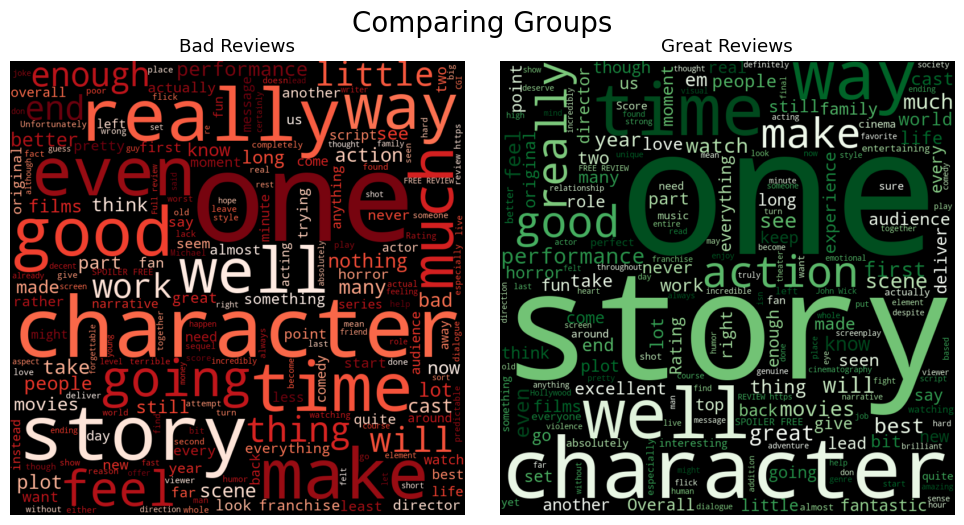

In [38]:
from wordcloud import WordCloud
custom_stopwords = [ *STOPWORDS,'movie','film']


# Create an instance of a WordCloud and use the generate method
bad_cloud = WordCloud(colormap="Reds",stopwords=custom_stopwords,
                      **cloud_kws).generate_from_text(GROUP_TEXTS["Bad"]['text'])
great_cloud = WordCloud(colormap="Greens",stopwords=custom_stopwords ,
                        **cloud_kws).generate_from_text(GROUP_TEXTS["Great"]['text'])


# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(fig_width*2, fig_height))

axes[0].imshow(bad_cloud, interpolation='bilinear')
axes[0].set_title("Bad Reviews")

axes[1].imshow(great_cloud, interpolation='bilinear')
axes[1].set_title("Great Reviews")

[ax.axis('off') for ax in axes]
fig.tight_layout();

fig.suptitle('Comparing Groups', fontsize=20, y=1.05)

In [39]:
# fpath_wc = "EDA/wordclouds-01.png"
fpath_wc  = FPATHS['eda']['wordclouds']

fig.savefig(fpath_wc, dpi=300, transparent=False, bbox_inches='tight')
# FILEPATHS['eda-word-cloud'] = fpath_wc

In [40]:
# from wordcloud import WordCloud, STOPWORDS
# custom_stopwords = [ *STOPWORDS,'movie','film']


# for group_name, group_docs in GROUP_TEXTS.items():
    
# # for chapter_name, chapter_text in Alice.items():
# # for author_name in df['author'].unique():
#     # author_text = "\n\n".join(df.loc[df['author']==author_name, 'text'])
#     # group_texts = "\n\n".join(group_docs['tokens'])
#     group_texts = group_docs['text']
#     wordcloud = WordCloud(width=800, height=400, 
#                           collocation_threshold=10,#colormap='Greens',
#                           stopwords=custom_stopwords,
#                      ).generate(group_texts)
    
#     # Display the generated image
#     fig, ax = plt.subplots(figsize=(10, 5))
#     ax.imshow(wordcloud, interpolation="bilinear")
#     ax.set_title(group_name)
#     ax.axis("off")
#     plt.show()


In [41]:
for group, docs in GROUP_TEXTS.items():
    print(f"\n- {group}")
    freq = FreqDist(docs['tokens'])
    display(freq.most_common(25))
    # ax= freq.plot(25)
    # ax.set_title(group)
    # fig = ax.get_figure()
    # fig.show()


- Great


[('film', 412),
 ('movie', 355),
 ('story', 200),
 ('like', 180),
 ('action', 128),
 ('great', 113),
 ('time', 111),
 ('good', 104),
 ('>', 99),
 ('way', 96),
 ('character', 94),
 ('characters', 92),
 ('best', 83),
 ('movies', 80),
 ('watch', 79),
 ('cast', 69),
 ('<', 65),
 ('excellent', 61),
 ('performances', 60),
 ('people', 58),
 ('scenes', 57),
 ('life', 55),
 ('world', 54),
 ('know', 52),
 ('feel', 52)]


- Bad


[('movie', 311),
 ('film', 296),
 ('like', 189),
 ('story', 150),
 ('good', 113),
 ('time', 101),
 ('way', 91),
 ('character', 90),
 ('characters', 85),
 ('going', 81),
 ('action', 72),
 ('better', 67),
 ('bad', 67),
 ('little', 64),
 ('plot', 62),
 ('people', 62),
 ('pretty', 61),
 ('work', 58),
 ('cast', 57),
 ('end', 54),
 ('films', 53),
 ('think', 53),
 ('long', 53),
 ('thing', 52),
 ('lot', 50)]

In [42]:
for group, docs in GROUP_TEXTS.items():
    print(f"\n- {group}")
    ngram_df = fn.nlp.get_ngram_measures_finder(docs['tokens'], ngrams=2, top_n=25, get_scores_df=True)
    display(ngram_df)


- Great


,Words,Raw Freq
0,"(spoiler, free)",0.001060
1,"(john, wick)",0.000856
2,"(free, review)",0.000775
3,"(<, >)",0.000734
4,"(rating, a-)",0.000612
5,"(feel, like)",0.000571
6,"(verdict, great)",0.000571
7,"(<, b)",0.000448
8,"(b, >)",0.000448
9,"(good, movie)",0.000448



- Bad


,Words,Raw Freq
0,"(spoiler, free)",0.000820
1,"(special, effects)",0.000777
2,"(feels, like)",0.000734
3,"(indiana, jones)",0.000647
4,"(free, review)",0.000388
5,"(jurassic, world)",0.000388
6,"(looks, like)",0.000388
7,"(plot, points)",0.000388
8,"(visual, effects)",0.000388
9,"(action, sequences)",0.000345


### Scattertext

In [43]:
# !pip install scattertext

In [44]:
# from IPython.display import IFrame
import scattertext as st
from scattertext import (
    SampleCorpora,
    produce_scattertext_explorer,
    produce_scattertext_html,
)
from scattertext.CorpusFromPandas import CorpusFromPandas

In [45]:
# nlp = spacy.load('en_core_web_sm')
corpus = st.CorpusFromPandas(
    df, category_col="target",
    text_col='review_text', #"lemmas-joined", 
    nlp=nlp,
).build().remove_terms(nlp.Defaults.stop_words, ignore_absences=True)

In [46]:
# Create html visualization
scatter_fname = FPATHS['eda']['scattertext'] #'EDA/scattertext.html'
# FILEPATHS['eda-scattertext'] = scatter_fname

os.makedirs(os.path.dirname(scatter_fname), exist_ok=True)

html = st.produce_scattertext_explorer(
    corpus,
    category="Great",
    category_name="High Ratings",
    not_category_name="Low Ratings",
    # minimum_term_frequency=3,
    width_in_pixels=800, height_in_pixels=600,
    metadata=df["review_text"],
    # x_label="1-Star Reviews",
    # y_label="5-Star Reviews"
)

with  open(scatter_fname, 'wb') as f:
    f.write(html.encode('utf-8'))
    
print(f'Open {scatter_fname} in Chrome or Firefox.')

Open EDA/scattertext.html in Chrome or Firefox.


## Modeling

In [47]:
from sklearn.feature_extraction.text import (
    ENGLISH_STOP_WORDS,
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)

In [48]:
X = df['review_text']#.astype(str)
y = df['target']#.astype(int)
y.value_counts(1)

Bad      0.515564
Great    0.484436
Name: target, dtype: float64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=321)
X_train.head()

197    I wanted to like this more than I did. It's fine, but it just doesn't resonate terribly well with me. Not to mention it feels a bit like a stage-play, taking place all on one street. I understand it's supposed to be the world through a child's ey...
367    _The Invitation_ started off so well, but eventually morphed into a generic film that I could have predicted from a mile away. The set up to the movie was decent, but the second act was when I really thought this movie nailed it. I really enjoyed...
801    If you are viewing this film with some of the Oscar flicks in mind then you might see it as terrible. But if you are watching it for some good ole entertainment's sake, then this one is surely not a miss. A definite viewing which will make you sm...
211                                                                                                                                                        Very enertaining movie. Action, adventure, comedy with a great story. Enjo

In [50]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import MultinomialNB


In [51]:
vectorizer = CountVectorizer(stop_words=None,
    ngram_range=(1,2))

clf_bayes = Pipeline([
    ('vectorizer',vectorizer),
    ('clf',MultinomialNB())
])
vectorizer.fit(X_train)
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)
# X_train_vec

CountVectorizer(ngram_range=(1, 2))

In [52]:
# Saves vocab - matches number of columns above
vocab_dict = vectorizer.vocabulary_
len(vocab_dict)

56850

In [53]:
# Words are now the feature_names
feature_names = vectorizer.get_feature_names_out()
len(feature_names)

56850

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00       199
       Great       1.00      1.00      1.00       186

    accuracy                           1.00       385
   macro avg       1.00      1.00      1.00       385
weighted avg       1.00      1.00      1.00       385



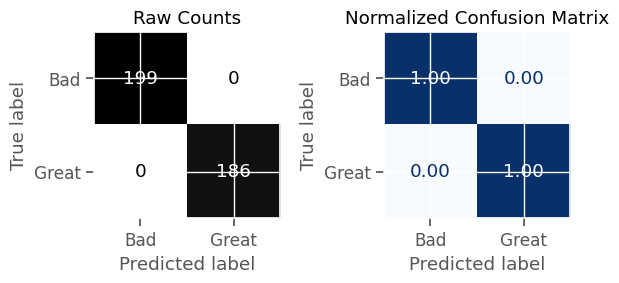


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         Bad       0.80      0.80      0.80        66
       Great       0.79      0.79      0.79        63

    accuracy                           0.80       129
   macro avg       0.80      0.80      0.80       129
weighted avg       0.80      0.80      0.80       129



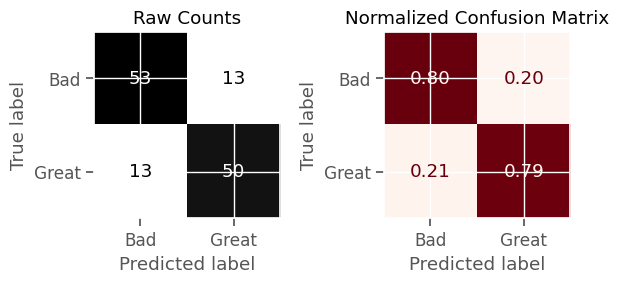

In [54]:

clf_bayes.fit(X_train, y_train)
fn.evaluate.evaluate_classification(clf_bayes, X_train,y_train, X_test, y_test)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00       199
       Great       1.00      1.00      1.00       186

    accuracy                           1.00       385
   macro avg       1.00      1.00      1.00       385
weighted avg       1.00      1.00      1.00       385



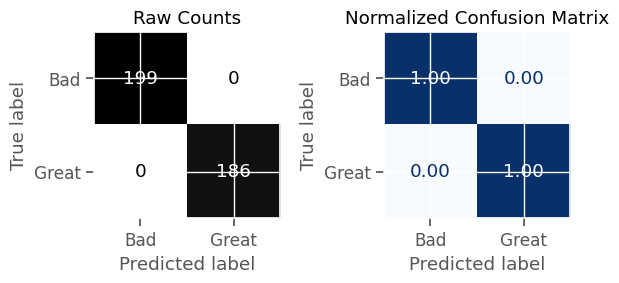


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         Bad       0.66      0.85      0.74        66
       Great       0.77      0.54      0.64        63

    accuracy                           0.70       129
   macro avg       0.72      0.69      0.69       129
weighted avg       0.71      0.70      0.69       129



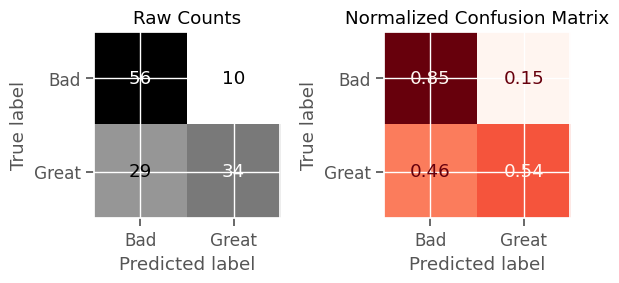

In [55]:

clf_rf = Pipeline([
    ('vectorizer',vectorizer),
    ('clf',RandomForestClassifier(class_weight='balanced'))
])
clf_rf.fit(X_train, y_train)

fn.evaluate.evaluate_classification(clf_rf, X_train,y_train, X_test, y_test)

### Saving ML Modeling Assets

In [56]:
# Getting the filepath for the training data
joblib_train = FPATHS['data']['ml']['train']
joblib_test = FPATHS['data']['ml']['test']

# Saving x-train and y-train 
joblib.dump([X_train, y_train], joblib_train)
joblib.dump([X_test, y_test], joblib_test)

['Data-NLP/testing-data.joblib']

In [57]:
joblib_bayes = FPATHS['models']['ml']['bayes']['saved_model']
joblib_forest = FPATHS['models']['ml']['random_forest']['saved_model']

joblib.dump(clf_bayes, joblib_bayes)
joblib.dump(clf_rf, joblib_forest)

['Models/random-forest.joblib']

# Deep NLP

In [58]:
from sklearn.preprocessing import LabelEncoder

### Preparing Tensorflow Dataset Objects

In [59]:
# Define X and y
X = df['review_text']
y_string= df['target']

# Instantiate the LabelEncoder
encoder = LabelEncoder()

# Fit and Transform the strings into integers
y = pd.Series(encoder.fit_transform(y_string))
y.value_counts()

0    265
1    249
dtype: int64

In [60]:
target_map = dict(zip(encoder.inverse_transform(y.unique()),y.unique()))
target_map

{'Great': 1, 'Bad': 0}

In [63]:
## Saving target_map
fpath_target_map = FPATHS['metadata']['target_lookup']#"Models/target-map.json"
# FILEPATHS['modeling-target-map'] = fpath_target_map

target_info = {
    "column": "target",
    "lookup_codes":  {k:str(v) for k,v in target_map.items()},#target_map,
    "lookup_names": {str(v): k for k, v in target_map.items()},
}

target_info

{'column': 'target',
 'lookup_codes': {'Great': '1', 'Bad': '0'},
 'lookup_names': {'1': 'Great', '0': 'Bad'}}

In [64]:
import json
# os.makedirs(os.path.dirname(fpath_target_map), exist_ok=True)
with open(fpath_target_map, 'w') as f:
    json.dump(target_info,f)

# FILEPATHS['target-map'] = fpath_target_map

In [66]:
# #
# rerun above

In [ ]:
encoder.inverse_transform(y.unique())

In [ ]:
# Convert to Dataset Object
ds = tf.data.Dataset.from_tensor_slices((X, y))
# Shuffle dataset
ds = ds.shuffle(buffer_size=len(ds),reshuffle_each_iteration=False)

In [ ]:
# Set the ratio of the train, validation, test split
split_train = .7
split_val =  .2
split_test =  1 -( split_train + split_val )
# Calculate the number of samples for training and validation data 
n_train_samples =  int(len(ds) * split_train)
n_val_samples = int(len(ds) * split_val)
n_test_samples = len(ds) -(n_train_samples + n_val_samples)
# Set the batch size
BATCH_SIZE =32
import math
# math.ceil will round up
# How many batches? 
n_train_batches = math.ceil(n_train_samples/BATCH_SIZE)
n_val_batches = math.ceil(n_val_samples/BATCH_SIZE)
n_test_batches = math.ceil(n_test_samples/BATCH_SIZE)
print(f"    - train:\t{n_train_samples} samples \t({n_train_batches} batches)")
print(f"    - val:  \t{n_val_samples} samples \t({n_val_batches} batches)")
print(f"    - test: \t{n_test_samples} samples \t({n_test_batches} batches)")



In [ ]:
# Use take and skip to define each set
train_ds = ds.take(n_train_samples).batch(batch_size=BATCH_SIZE)
# Skip over the training batches and take the validation batches
val_ds = ds.skip(n_train_samples).take(n_val_samples).batch(batch_size=BATCH_SIZE)
# Skipver the train and validation batches, the remaining are the test batches
test_ds = ds.skip(n_train_samples + n_val_samples).batch(batch_size=BATCH_SIZE)
# Confirm the number of batches in each
print (f' There are {len(train_ds)} training batches.')
print (f' There are {len(val_ds)} validation batches.')
print (f' There are {len(test_ds)} testing batches.')



In [ ]:
# taking a sample 
example_X, example_y= train_ds.take(1).get_single_element()
print(example_X)
print(example_y)

In [ ]:
## Saving Train and test dataset
fname_train_ds = FPATHS['data']['nn']['train']
train_ds.save(path=fname_train_ds,)

fname_test_ds = FPATHS['data']['nn']['test']
test_ds.save(path=fname_test_ds,)

In [ ]:
# Create the TextVectorization layer
count_vectorizer = tf.keras.layers.TextVectorization(
    standardize="lower_and_strip_punctuation",
    output_mode="count"
)

In [ ]:


# @tf.function
# def extract_text(x,y):
#     return x

# def fn.nlp.make_text_vectorization_layer(train_ds,  max_tokens=None, 
#                                   split='whitespace',
#                                   standardize="lower_and_strip_punctuation",
#                                   output_mode="int",
#                                   output_sequence_length=None,
#                                   ngrams=None, pad_to_max_tokens=False,
#                                   verbose=True,
#                                   **kwargs,
#                                  ):


#     # Build the text vectorization layer
#     text_vectorizer = tf.keras.layers.TextVectorization(
#         max_tokens=max_tokens,
#         standardize=standardize, 
#         output_mode=output_mode,
#         output_sequence_length=output_sequence_length,
#         **kwargs
#     )

#     # Get just the text from the training data
#     if isinstance(train_ds, (np.ndarray, list, tuple, pd.Series)):
#         ds_texts = train_ds
#     else:
#         try:
#             ds_texts = train_ds.map(extract_text)#lambda x, y: x )
#         except:
#             ds_texts = train_ds
            
#     # Fit the layer on the training texts
#     text_vectorizer.adapt(ds_texts)
    
    
#     if verbose:
#         # Print the params
#         print( "\ntf.keras.layers.TextVectorization(" )
#         config = text_vectorizer.get_config()
#         pprint(config,indent=4)
#         print(")")
               
#     # SAVING VOCAB FOR LATER
#     # Getting list of vocab 
#     vocab = text_vectorizer.get_vocabulary()
#     # Save dictionaries to look up words from ints 
#     int_to_str  = {idx:word for idx, word in enumerate(vocab)}
    
#     return text_vectorizer, int_to_str

fn.nlp.make_text_vectorization_layer

In [ ]:
df['sequence_length'] = df['review_text'].map( lambda x: len(x.split(" ")))
# filter_short = df['sequence_length']< 400
sns.histplot(df['sequence_length'])

In [ ]:
# Define sequence length as a variable for future use
SEQUENCE_LENGTH = 400
# Define vectorizer layer. Use the custom function to build and fit the vectorizer before using it in model
sequence_vectorizer, vocab_lookup = fn.nlp.make_text_vectorization_layer(train_ds, 
                                                                  output_mode='int', 
                                                                  output_sequence_length = SEQUENCE_LENGTH, 
                                                                  verbose=True)

## Sequence Models

In [ ]:
# Define a function for building an LSTM model
from tensorflow.keras import layers, optimizers, regularizers
from tensorflow.keras.models import Sequential

# @tf.function
def build_lstm_model(text_vectorization_layer):
    VOCAB_SIZE = text_vectorization_layer.vocabulary_size()

    # Define sequential model with pre-trained vectorization layer and *new* embedding layer
    lstm_model = Sequential(
        [
            text_vectorization_layer,
            layers.Embedding(
                input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=SEQUENCE_LENGTH
            ),
        ]
    )

    # Add *new* LSTM layer
    lstm_model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
    lstm_model.add(layers.Dropout(0.3))
    lstm_model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
    lstm_model.add(layers.GlobalMaxPooling1D())

    # Add output layer
    lstm_model.add(layers.Dense(len(classes), activation="softmax"))

    # Compile the model
    lr_schedule = optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.95
    )  # 0.9)
    optimizer = optimizers.legacy.Adam(learning_rate=lr_schedule)
    lstm_model.compile(
        optimizer=optimizer,  #'adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    lstm_model.summary()
    return lstm_model

In [ ]:
# # Code below is from CNN Week
# def get_callbacks(patience=3, monitor='val_accuracy'):
#     early_stop = tf.keras.callbacks.EarlyStopping(patience=patience, monitor=monitor, verbose=True)
#     return [early_stop]


### Call backs
# @tf.function
def get_callbacks(monitor='val_accuracy',patience=3, restore_best_weights=True,
                  start_from_epoch=0,baseline_value=None,
                  verbose_early_stopping=1,  
                  tensborboard=True, logdir="/tmp/tb_logs",
                 tb_embed_freq=0, tb_write_images = False, tb_hist_freq = 0):

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor=monitor, patience=patience, #mode=mode, 
                                                      restore_best_weights=restore_best_weights,
                                                      baseline=baseline_value,
                                                      start_from_epoch=start_from_epoch,
                                                      verbose=verbose_early_stopping)

    if tensborboard:
        tboard = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=tb_hist_freq,write_images=tb_write_images,
                                                embeddings_freq=tb_embed_freq,)
        return [ early_stopping, tboard]
    else:
        return [early_stopping]

In [ ]:
EMBED_DIM = 100
classes = y_train.unique()
# Build the lstm model and specify the vectorizer
lstm_model = build_lstm_model(sequence_vectorizer)

# Defien number of epocs
EPOCHS = 30

# Fit the model
history = lstm_model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=get_callbacks(),
)

In [ ]:
# Obtain the results
results = fn.evaluate.evaluate_classification_network(
    lstm_model, X_train=train_ds, 
    X_test=test_ds, history=history
);

### Save Model

In [ ]:
fpath_lstm = FPATHS['models']['nn']['LSTM']['saved_model']
lstm_model.save(fpath_lstm, save_format='tf')

### Attention Models

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras import Model, Input


def build_transformer_model(text_vectorization_layer):
    """ Need to use the Function API for Attention"""
    
    MAX_TOKENS = text_vectorization_layer.vocabulary_size()
    
    input_layer = Input(shape=(SEQUENCE_LENGTH,),dtype=tf.string)
    flattened_input = tf.reshape(input_layer, (-1,))
    vectorizer_layer = text_vectorization_layer(flattened_input)
    
    embed_layer = tf.keras.layers.Embedding(input_dim=MAX_TOKENS, 
                                            output_dim=EMBED_DIM, 
                                            input_length=SEQUENCE_LENGTH)(vectorizer_layer)

    # 10/19/23: had num_heads =128, key_dim=120
    attention_layer = layers.MultiHeadAttention(num_heads=8, key_dim=50, value_dim=EMBED_DIM, dropout=0.1)(embed_layer, embed_layer,embed_layer)
    flatten_layer = layers.Flatten()(attention_layer)
    dense_layer =  layers.Dense(64, activation='relu')(flatten_layer)
    output_layer = layers.Dense(3, activation='softmax')(dense_layer)
    model = Model(inputs=input_layer, outputs=output_layer)


    
    lr_schedule = optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.01,
        decay_steps=10000,
        decay_rate=0.9)
    optimizer = optimizers.legacy.Adam(learning_rate=lr_schedule)

    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
%%time

MAX_TOKENS = None  # 20_000  # Max Vocab
SEQUENCE_LENGTH = 400 #200 # Max Lenght of texts
EMBED_DIM = 200  # dimensions for Embedding layer
BATCH_SIZE_SEQ = 32


# # # Making datasets
# train_ds, val_ds, test_ds = train_val_test_datasets(
#     X, y, BATCH_SIZE=BATCH_SIZE_SEQ, verbose=True, show_class_balance=True
# )  # , show_class_balance=True)

## Make vectorizer
seq_vectorizer, int_to_str = fn.nlp.make_text_vectorization_layer( # accepts all args of TextVectorization layer
    train_ds, # training texts
    max_tokens=MAX_TOKENS,
    standardize="lower_and_strip_punctuation",
    output_mode="int",
    output_sequence_length=SEQUENCE_LENGTH,
    verbose=True,
)




## Fit and evaluate model
EPOCHS = 100
model = build_transformer_model(seq_vectorizer)
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    # class_weight=class_weights_dict,
    callbacks=get_callbacks()#start_from_epoch=2, patience=2, monitor='val_loss', mode='min',logdir="/tmp/tb_logs_attention"),
)
fn.evaluate.evaluate_classification_network(
    model, #X_train=train_ds, 
    X_test=test_ds, history=history
);

In [ ]:
fpath_attn = FPATHS['models']['nn']['Attention']['saved_model']
model.save(fpath_attn, save_format='tf')